In [31]:
from IPython.display import clear_output

In [32]:
clear_output()

In [33]:
import tf_explain

In [34]:
from tf_explain.core.grad_cam import GradCAM

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Flatten, Dense, Reshape, Multiply, Add,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import tensorflow as tf
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesTensorFlowKeras
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.17.0


In [36]:
import numpy as np
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [37]:
data_path = 'ckplus/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]

cnt = 0
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        cnt += 1
        img_data_list.append(input_img_resize)
    print(cnt)
    cnt = 0
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

135
Loaded the images of dataset-contempt

54
Loaded the images of dataset-disgust

177
Loaded the images of dataset-fear

75
Loaded the images of dataset-happy

207
Loaded the images of dataset-sadness

84
Loaded the images of dataset-surprise

249


(981, 48, 48, 3)

In [38]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [39]:
num_of_samples

981

In [40]:


# labels[0:248]=0 #249
# labels[249:323]=1 #75
# labels[324:407]=2 #84
# labels[408:584]=3 #177
# labels[585:638]=4 #54
# labels[639:845]=5 #207
# labels[846:980]=6 #135

labels[0:135] = 0
labels[135:189] = 1
labels[189:366] = 2
labels[366:441] = 3
labels[441:648] = 4
labels[648:732] = 5
labels[732:] = 6

# names = ['surprise','fear','sadness','disgust' ,'contempt','happy','anger']
names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [41]:
# from keras.utils import np_utils
# Y = np_utils.to_categorical(labels, num_classes)

# #Shuffle the dataset
# x,y = shuffle(img_data,Y, random_state=2)
# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
# x_test=X_test

In [42]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(labels, num_classes)

# Shuffle dataset
from sklearn.utils import shuffle
x, y = shuffle(img_data, Y, random_state=2)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test = X_test


In [43]:
import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers
import numpy as np

@tf.keras.utils.register_keras_serializable()
class StandardizedConv2DWithOverride(layers.Conv2D):
    def convolution_op(self, inputs, kernel):
        mean, var = tf.nn.moments(kernel, axes=[0, 1, 2], keepdims=True)
        return tf.nn.conv2d(
            inputs,
            (kernel - mean) / tf.sqrt(var + 1e-10),
            padding="VALID",
            strides=list(self.strides),
            name=self.__class__.__name__,
        )

### Architecture - 1

In [3]:

# input_layer = Input((48,48,3))

# # Encoder
# f1=StandardizedConv2DWithOverride(32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)
# f1=BatchNormalization()(f1)
# f=StandardizedConv2DWithOverride(32, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
# f=StandardizedConv2DWithOverride(32, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=MaxPooling2D(2,2)(f)
# f2=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)


# f1=StandardizedConv2DWithOverride(32, kernel_size=5, strides=1, padding='same', activation='relu')(f1)
# f1=StandardizedConv2DWithOverride(32, kernel_size=5, strides=2, padding='same', activation='relu')(f1)

# f=concatenate([f,f1])
# f=BatchNormalization()(f)

# f1=StandardizedConv2DWithOverride(64, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=StandardizedConv2DWithOverride(64, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
# f=StandardizedConv2DWithOverride(64, kernel_size=3, strides=1, padding='same', activation='relu',name='BeforeFinal_Layer')(f)
# f=MaxPooling2D(2,2)(f)
# f3=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)


# f1=StandardizedConv2DWithOverride(64, kernel_size=5, strides=1, padding='same', activation='relu')(f1)
# f1=StandardizedConv2DWithOverride(64, kernel_size=5, strides=2, padding='same', activation='relu')(f1)

# f=concatenate([f,f1])
# f=BatchNormalization()(f)
                    
# f1=StandardizedConv2DWithOverride(128, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
# f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=MaxPooling2D(2,2)(f)
# f4=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)

# f1=StandardizedConv2DWithOverride(128, kernel_size=5, strides=1, padding='same', activation='relu')(f1)
# f1=StandardizedConv2DWithOverride(128, kernel_size=5, strides=2, padding='same', activation='relu')(f1)
# f1=BatchNormalization()(f1)

# f=concatenate([f,f1])

# f1=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
# f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f)
# f=MaxPooling2D(2,2)(f)



# f1=Conv2D(512, kernel_size=3, strides=2, padding='same', activation='relu')(f1)
# f1=BatchNormalization()(f1)

# f=concatenate([f,f1])
# #f=BatchNormalization()(f)
# f=StandardizedConv2DWithOverride(512, kernel_size=3, strides=1, padding='same', activation='relu', name='Final_Layer')(f)
# #f=Conv2D(512, kernel_size=1, strides=2, padding='same', activation='relu')(f)
# f=BatchNormalization()(f)
                    
# f= Flatten()(f)
# f=Dropout(rate=0.3)(f)
# f=BatchNormalization()(f)
# f=Dense(512, activation='relu')(f)
# f=Dropout(rate=0.32)(f)
# f=BatchNormalization()(f)
# output_layer=Dense(7, activation='softmax')(f)




# # Model
# model = Model(
#     inputs=[input_layer],
#     outputs=[output_layer]
# )
# model.summary()

# # from tensorflow.keras.utils import plot_model
# # from IPython.display import Image

# # plot_model(model, to_file='model.png', show_shapes=True)
# # Image("model.png")

In [45]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True)


### Architecture 2

In [46]:
input_layer = Input((48,48,3))

# Encoder
f1=StandardizedConv2DWithOverride(32, kernel_size=3, strides=3, padding='same', activation='relu')(input_layer)
f1=BatchNormalization()(f1)
f=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=MaxPooling2D(2,2)(f)
f2=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)


f1=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f1=Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(f1)

f=concatenate([f,f1])
f=BatchNormalization()(f)

f1=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu',name='BeforeFinal_Layer')(f)
f=MaxPooling2D(2,2)(f)
f3=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)


f1=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f1=Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu')(f1)

f=concatenate([f,f1,f2])
f=BatchNormalization()(f)
                    
f1=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=MaxPooling2D(2,2)(f)
f4=Conv2D(32, kernel_size=1, strides=2, padding='same', activation='relu')(f)

f1=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f1=Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu')(f1)
f1=BatchNormalization()(f1)

f=concatenate([f,f1,f3])

f1=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=MaxPooling2D(2,2)(f)


f1=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f1)
f1=Conv2D(256, kernel_size=3, strides=2, padding='same', activation='relu')(f1)
f1=BatchNormalization()(f1)

f=concatenate([f,f1,f4])
#f=BatchNormalization()(f)
f=Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu', name='Final_Layer')(f)
#f=Conv2D(512, kernel_size=1, strides=2, padding='same', activation='relu')(f)
f=BatchNormalization()(f)
                    
f= Flatten()(f)
f=Dropout(rate=0.3)(f)
#f=BatchNormalization()(f)
f=Dense(1024, activation='relu')(f)
f=Dropout(rate=0.32)(f)
#f=BatchNormalization()(f)
output_layer=Dense(7, activation='softmax')(f)

# Model
model = Model(
    inputs=[input_layer],
    outputs=[output_layer]
)
model.summary()

# from tensorflow.keras.utils import plot_model
# from IPython.display import Image

# plot_model(model, to_file='model.png', show_shapes=True)
# Image("model.png")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ standardized_conv2… │ (None, 16, 16,    │        896 │ input_layer_3[0]… │
│ (StandardizedConv2… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ standardized_con… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 16, 16,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 16, 16,    │      9,248 │ conv2d_39[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 16, 16,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 8, 8, 32)  │          0 │ conv2d_40[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 8, 8, 32)  │      9,248 │ conv2d_42[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 8, 8, 64)  │          0 │ max_pooling2d_12… │
│ (Concatenate)       │                   │            │ conv2d_43[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ concatenate_12[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_44[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BeforeFinal_Layer   │ (None, 8, 8, 64)  │     36,928 │ conv2d_45[0][0]   │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_44[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 4, 4, 64)  │          0 │ BeforeFinal_Laye… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 4, 4, 64)  │     36,928 │ conv2d_47[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 4, 4, 32)  │      1,056 │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 4, 4, 160) │          0 │ max_pooling2d_13… │
│ (Concatenate)       │                   │            │ conv2d_48[0][0],  │
│                     │                   │            │ conv2d_41[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 6,188,135 (23.61 MB)

 Trainable params: 6,185,831 (23.60 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [47]:
input_shape=(48,48,3)

#model = Sequential()
#model.add(model)

In [48]:
epochs = 300


learning_rate = 1e-3
opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#checkpoint = ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, mode='max', verbose=1)

#reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience = 2, min_lr=0.00001, model='auto')

callbacks = [ModelCheckpoint('model.keras',monitor="val_accuracy", verbose=1, save_best_only=True),
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=20, verbose=1, min_lr=1e-6),
            EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=100)]

history = hist = model.fit(X_train, y_train, batch_size=7, epochs=epochs, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3491 - loss: 1.9613
Epoch 1: val_accuracy improved from -inf to 0.15541, saving model to model.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.3497 - loss: 1.9600 - val_accuracy: 0.1554 - val_loss: 3.3760 - learning_rate: 0.0010
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5767 - loss: 1.3735
Epoch 2: val_accuracy improved from 0.15541 to 0.61486, saving model to model.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5771 - loss: 1.3721 - val_accuracy: 0.6149 - val_loss: 1.0326 - learning_rate: 0.0010
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7159 - loss: 0.7597
Epoch 3: val_accuracy did not improve from 0.61486
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.7160 - loss: 0.7598 - val_accuracy: 0.2365 - val_loss: 3.0959 - learning_rate: 0.0010
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7788 - loss: 0.6717
Epoch

In [49]:

# model.save('my_model.h5')


In [50]:
# model.save('my_saved_model.keras') 

In [51]:
# model.save('model_file/model4.keras')
import os

model_dir = 'model_file'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model.save(os.path.join(model_dir, 'model4.keras'))


In [52]:
from tensorflow.keras.models import load_model

new_model = load_model('model_file/model4.keras', custom_objects={'StandardizedConv2DWithOverride': StandardizedConv2DWithOverride})


## Convert to TFLite Model

In [53]:

converter = tf.lite.TFLiteConverter.from_keras_model(new_model)

# If you need to apply quantization, you can set the optimizations
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Generate the TensorFlow Lite model
tflite_model = converter.convert()

with open('model_file/model4.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\vinay\AppData\Local\Temp\tmp46lbl53_\assets


INFO:tensorflow:Assets written to: C:\Users\vinay\AppData\Local\Temp\tmp46lbl53_\assets


Saved artifact at 'C:\Users\vinay\AppData\Local\Temp\tmp46lbl53_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1520722679696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722675856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722678352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722678160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722678928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722677200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722678736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520722679312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520780784080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1520780782160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  152072

In [54]:
# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter(model_path='model_file/model4.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[[0.14896715 0.05375525 0.03493872 0.06502011 0.39263707 0.22550975
  0.07917193]]


## Visualization

<Figure size 2000x1000 with 0 Axes>

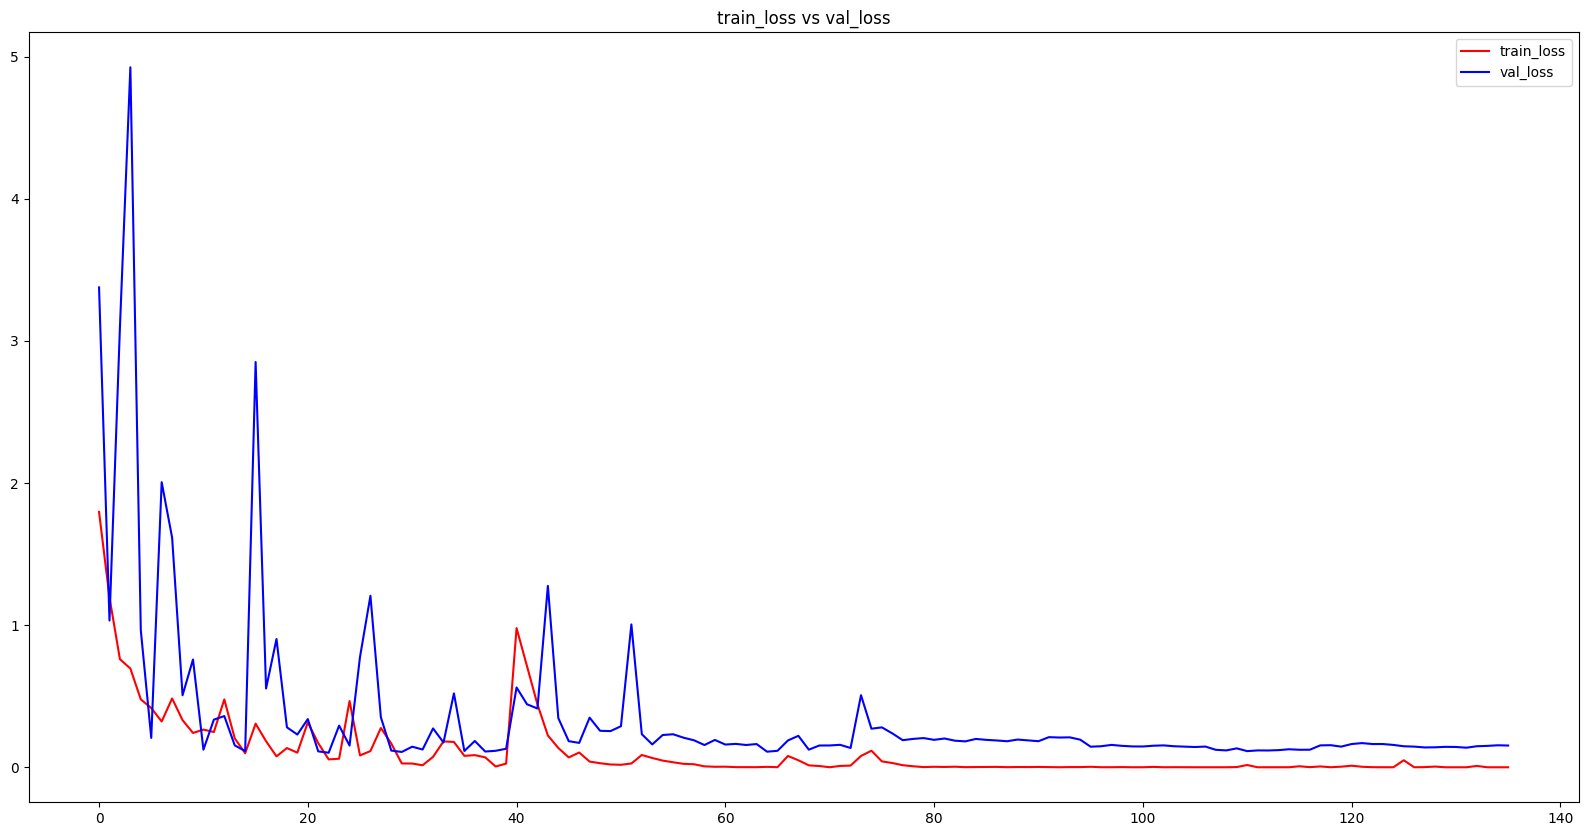

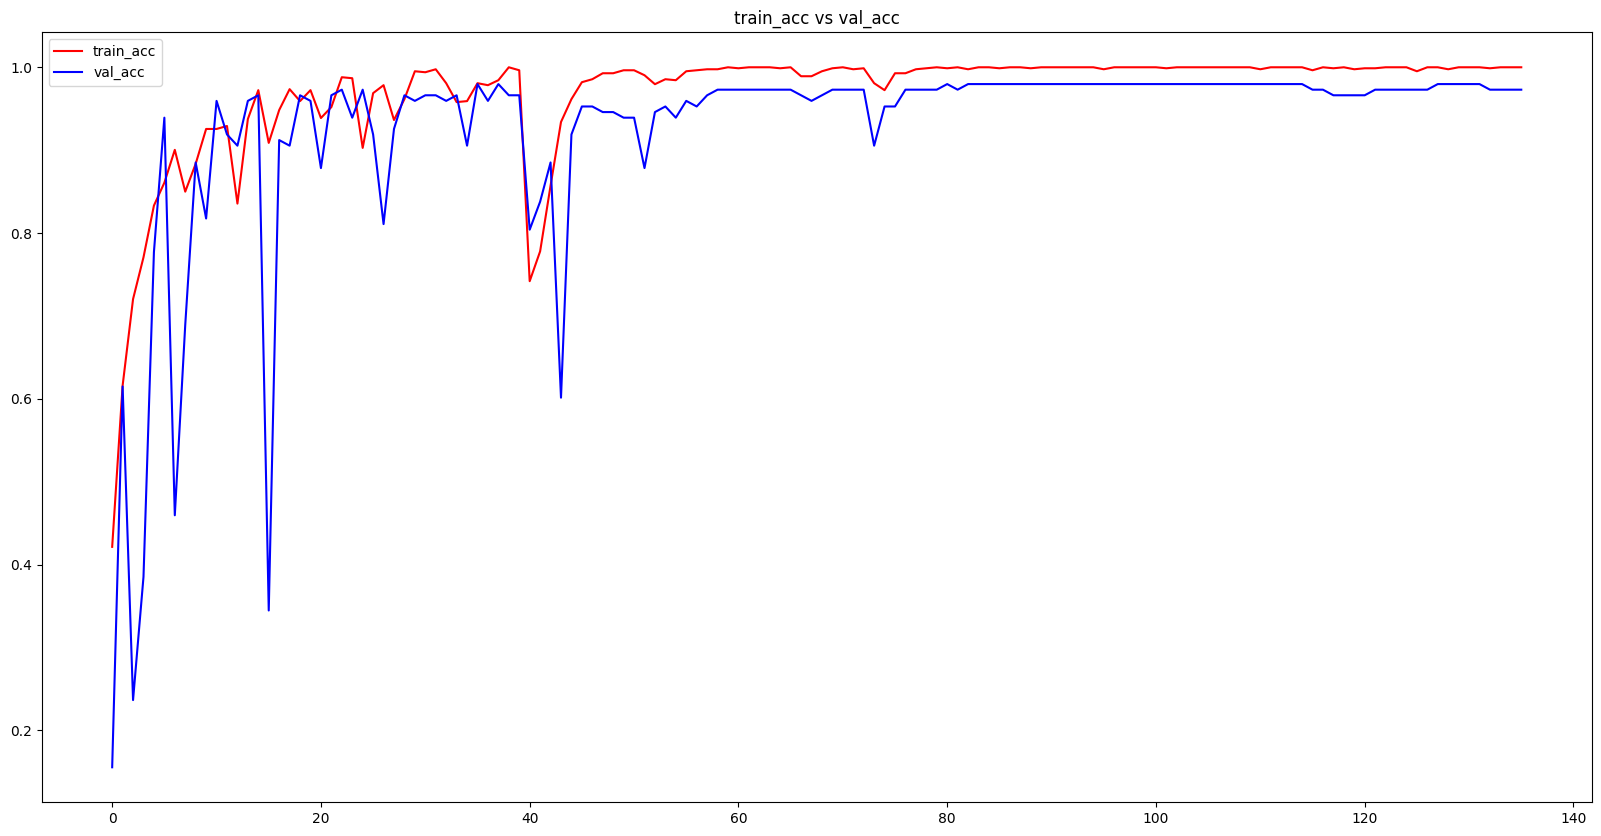

<Figure size 2000x1000 with 0 Axes>

In [55]:
# losses and accuracy
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [56]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9754 - loss: 0.1547
Test Loss: 0.11452317982912064
Test accuracy: 0.9797297120094299


In [57]:
test_image = X_test[0:1]
print(test_image.shape)

(1, 48, 48, 3)


In [58]:
print(model.predict(test_image))
classes_x=np.argmax(model.predict(test_image),axis=1)
print(y_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[9.9999845e-01 1.9520028e-08 7.9302987e-07 5.9338268e-10 2.0673949e-09
  7.1993458e-07 1.9139242e-10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[1. 0. 0. 0. 0. 0. 0.]]


## Prediction


In [59]:
# res = np.argmax(model.predict(X_test[0:9]),axis=1)
# plt.figure(figsize=(10, 10))

# for i in range(0, 9):
#     plt.subplot(330 + 1 + i)
#     plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
#     plt.gca().get_xaxis().set_ticks([])
#     plt.gca().get_yaxis().set_ticks([])
#     plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# # show the plot
# plt.show()

### Predicting for 25 images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


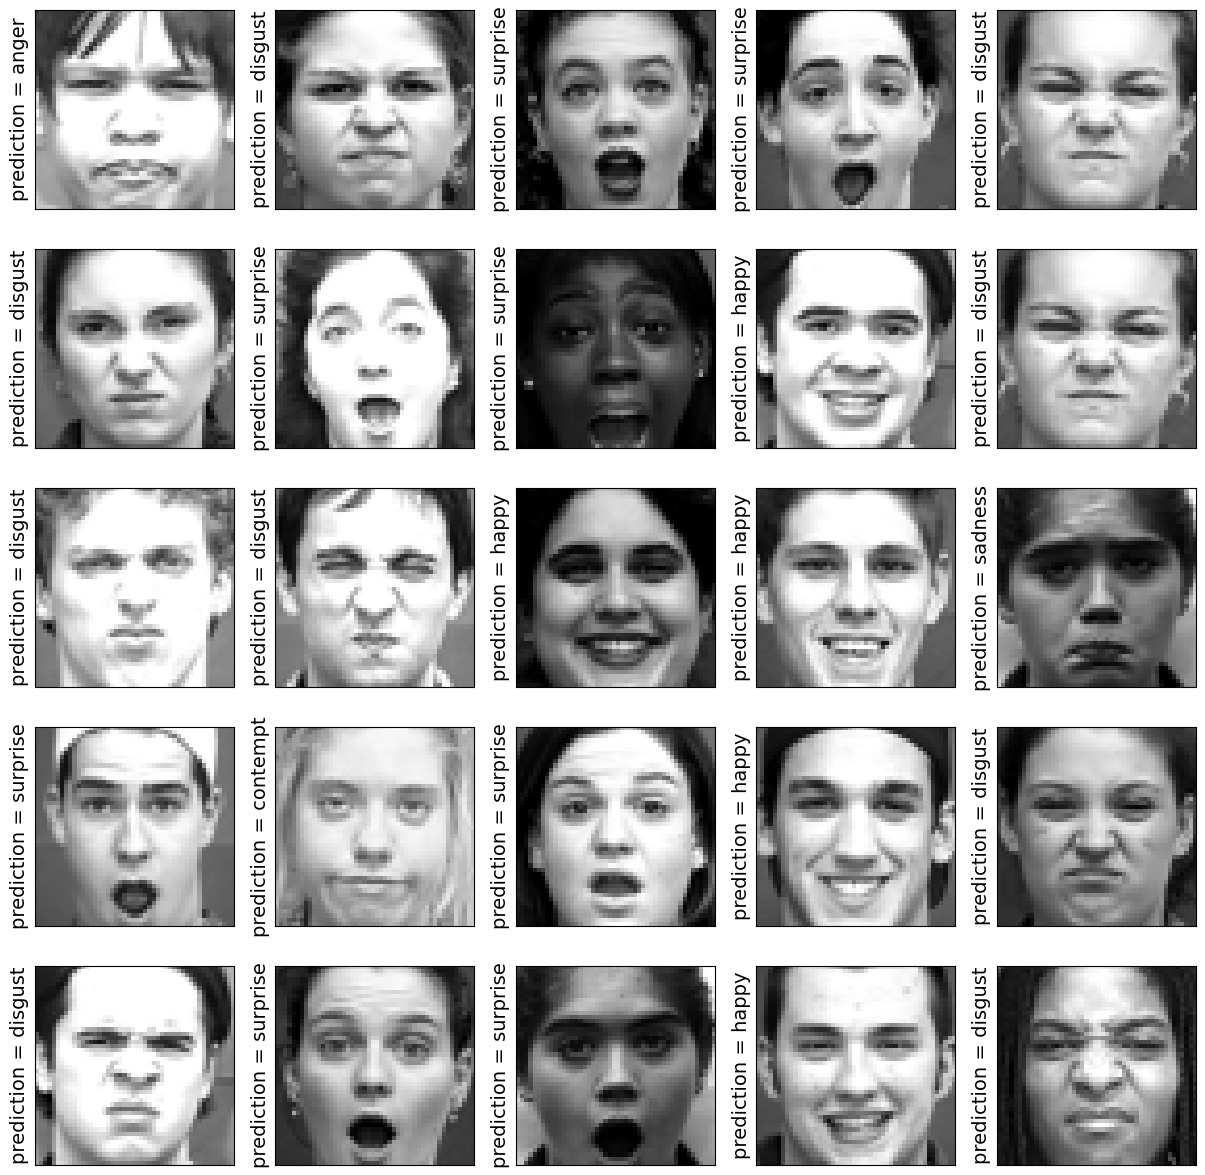

In [60]:
res = np.argmax(model.predict(X_test[0:25]), axis=1)

plt.figure(figsize=(15, 15))

# Plotting for  25 images
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

plt.show()

### Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


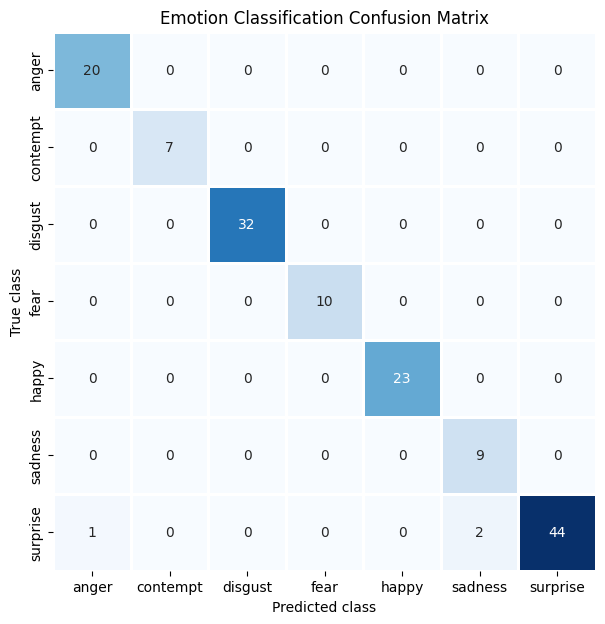

In [61]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = model.predict(X_test)
predicted_classes = np.argmax(results, axis=1)
y_true = np.argmax(y_test, axis=1)

label = ['anger','contempt','disgust','fear','happy','sadness','surprise']

labels = {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'sadness', 6: 'surprise'}

cm = confusion_matrix(y_true, predicted_classes)

cm_df = pd.DataFrame(cm, index=label, columns=label)

plt.figure(figsize=(7, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', cbar=False, linewidth=2, fmt='d')
plt.title('Emotion Classification Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Classification Report

In [63]:
from sklearn.metrics import classification_report

target_names = ['anger','contempt','disgust','fear','happy','sadness','surprise']
report = classification_report(y_true, predicted_classes, target_names=target_names)
print(report)

              precision    recall  f1-score   support

       anger       0.95      1.00      0.98        20
    contempt       1.00      1.00      1.00         7
     disgust       1.00      1.00      1.00        32
        fear       1.00      1.00      1.00        10
       happy       1.00      1.00      1.00        23
     sadness       0.82      1.00      0.90         9
    surprise       1.00      0.94      0.97        47

    accuracy                           0.98       148
   macro avg       0.97      0.99      0.98       148
weighted avg       0.98      0.98      0.98       148



### Testing for raw faces

In [2]:
# test_path = './test'
# test_img_list = os.listdir(test_path)

# img_file = test_img_list[6]
# img_path = os.path.join(test_path, img_file)

# input_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# # Check if the image was loaded correctly
# if input_img is None:
#     print("Error: Image not found or unable to load.")
# else:
#     # Resize the image to (48x48) if needed (you can change this size)
#     input_img_resize = cv2.resize(input_img, (48, 48))

#     # Display the greyscale image using matplotlib
#     plt.imshow(input_img_resize, cmap='gray')  # Use 'gray' colormap for greyscale images
#     plt.title(f"Greyscale Image: {img_file}")
#     plt.axis('off')  # Hide axis
#     plt.show()

In [1]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # Assuming input_img_resize is your preprocessed greyscale image (48x48)
# input_img_resize = cv2.resize(input_img, (48, 48))

# # Expand dimensions for batch size and replicate the channel to make it a 3-channel image
# input_img_rgb = np.stack((input_img_resize,)*3, axis=-1)

# # Expand dimensions to fit the model input (add batch dimension)
# input_img_rgb = np.expand_dims(input_img_rgb, axis=0)

# # Normalize the image
# input_img_rgb = input_img_rgb.astype('float32') / 255

# # Predict the class of the image
# prediction = model.predict(input_img_rgb)
# predicted_class = np.argmax(prediction, axis=1)[0]

# # Display the image with its prediction
# plt.imshow(input_img, cmap='gray')
# plt.title(f"Prediction: {getLabel(predicted_class)}")
# plt.axis('off')
# plt.show()
